# Aprendizagem Automática Avançada
## TP1 - Problema 3
João Romão - 55760,
Pedro França - 55848

In [1]:
import pandas as pd
import numpy as np
import sklearn
import math
from numpy import random

## Dataset Generation

Generating 200 points of one period (from 0 to 2π) of the sin function.

In [2]:
i=0
x=[]
y=[]

while (i < 200):
    a = (random.randint(0, 200)/100)*math.pi
    b = math.sin(a)
    x.append(a)
    y.append(b)
    i=i+1
    
d = {'x': x, 'y': y}
df = pd.DataFrame(data=d)
df

,x,y
0,3.958407,-0.728969
1,5.937610,-0.338738
2,5.686283,-0.562083
3,0.502655,0.481754
4,2.387610,0.684547
...,...,...
195,1.602212,0.999507
196,2.796017,0.338738
197,4.398230,-0.951057
198,5.152212,-0.904827


By plotting the data, we observe it follows the curve of the sin function, as expected.

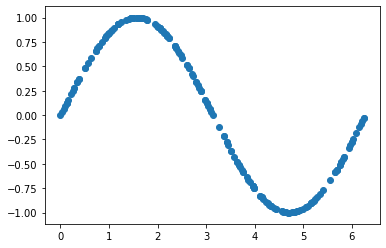

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df["x"],df["y"])
plt.show()

## Training the neural network model

We chose the MLPRegressor from sklearn.neural_network, which we trained with 10% of the data.

When fitting the model, we started with the default parameters of the MLPRegressor and then, to improve the score, we changed those we considered to be the ones with the most impact in the results of our neural network, namely "activation", "solver", and "hidden_layer_sizes". We iteratively evaluated the plot of the results and scores for both the training and testing datasets (see the "Neural networks results" section), to assess if the model was not being overfitted.

After testing the different parameters of the algorithm, we chose the logistic activation sigmoid function (activation = "logistic"). This one and the hyperbolic tan activation function (tanh) were both good and similar in predicting the correct results. 

We conducted a similar approach for choosing the solver parameter. We searched and tested the 3 different options (lbfgs, sgd, adam) and found that the solver lbfgs produced the best results for this problem. This solver is commonly used on small datasets, becoming advantageous due to its faster convergence and a better performance in these cases.

To improve the robustness of the our predictions, we changed our hidden layer number to 3. Less than that, the predictions produced by the model were less acurate, with lower scores. For higher hidden layer numbers, the score did not improve, so we did not increase this number further.

In [4]:
#separating the x and y data into df_x and df_y, respectively, and reshaping
df_x = df["x"]
df_y = df["y"].ravel()

df_x = df_x.values.reshape(-1,1)

In [5]:
#separating data into train and test subsets
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(df_x, df_y, test_size = 0.90 , random_state =4)

In [6]:
#fitting the MLP Regressor
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(activation = "logistic",solver='lbfgs', hidden_layer_sizes = 3 , random_state= 1, max_iter = 300)
nn.fit(x_train, y_train)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=3, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=300,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

## Neural network results

Plotting the training data, MLP Regressor results, and checking the R² scores of the model.

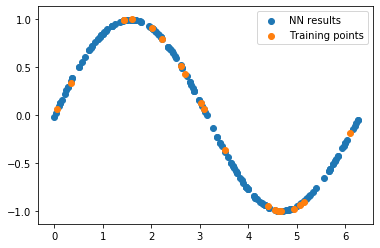

Score with training data: 0.9998884972749382
Score with testing data: 0.9997923237875543


In [7]:
#calculating y_pred for plotting the results of the 
y_pred = nn.predict(x_test)

plt.scatter(x_test,y_pred, label = "NN results") # results of our model
plt.scatter(x_train,y_train, label = "Training points") #original data, used for training

plt.legend()
plt.show()

print("Score with training data: " + str(nn.score(x_train, y_train)))
print("Score with testing data: " + str(nn.score(x_test, y_test)))

By inspecting the plot, it is possible to see both the data used to train the model (10% of the dataset, 20 points), in orange, and the points that resulted from the MLP Regressor model (90% of the dataset, 180 points), in blue. As we can observe from the plot and scores, the model can generate highly accurate predictions for the data even when it is trained with a small portion of the dataset (10%), which illustrates the power of this supervised method. We could still obtain very good results using 5% of the data for training but due to the reduction of the score, albeit small, we decided to maintain the training of the model with 10% of the data.